# Different Deep Learning Packages


### Torch
 - Lua
 
### Caffe
 - very good for vision research
 - C++


## Theano, Tensorflow
- similarities and differences ... pros and cons
 

### Pylearn2
 - more research oriented .. and you can see examples of advanced models
 - if you want to work with generative models
 - not continued any more .. but its good to study the code and take ideas of it.
 
### Keras
 - Simplified and modular API structure.
 - Supports both Theano and Tensorflow backend .. so you can juggle between both and get the best of both worlds.. you are also welcome to develop support for new backends.
 - Can be used to create complex models by customizing any part 
   - custom layer
   - custom loss, metrics
   - custom activation function
   - Functional models (can be used to build complex models other than sequential... also for Multiple Prediction Models)
 - Can be hooked into existing Theano/Tenserflow code
   - Can be directly hooked up to Theano code .. for tensorflow you need to take care of using the same session (follow the bellow link)
   - https://blog.keras.io/keras-as-a-simplified-interface-to-tensorflow-tutorial.html
 
 Documentation: https://keras.io/

_______________________________________________________________________________________________________________________

# Backends 

config file ~/.keras/keras.json


 - \$ KERAS_BACKEND=theano      python script.py
 - \$ KERAS_BACKEND=tenserflow  python script.py
 
Source Code: keras/backend/

In [1]:
from keras import backend as K

if K.backend() == 'theano':
    print '\nWe are using THEANO backend'
else:
    print '\nWe are using TENSORFLOW backend'

Using Theano backend.



We are using THEANO backend


_______________________________________________________________________________________________________________________

# Tricks of setting up Neural Networks and Deep Learning

Even though NNs are theoretically universal function approximator, it shouldn't be used as black box. For one the number of hidden units exponentially decreases with number of layers for the same capacity (what is capacity?) of the network. But training networks with more layers is slower .. and the set of tricks that allows to speed up the training is called Deep Learning. 

Some Tricks:
 - input representation
 - parameter initialization
 - target values
 - choice of learning rates
 - choice of nonlinearity (Activation functions)
 - SGD and other 2nd order algorithms to optimize - learning rate adaptation(Momentum)
 
Fast minimization vs Good Generalization
 - Early Stopping
 - Weight Decay
 - Hyper-parameter Search
 - Validation Error
 - Dropout
 
Network Models
 - Different Network architectures are suited to different problem domains
 - Multi-Task Learning/Prediction
 - Idea of Scaling and Centering ... not just to inputs but to all factors of NN .. most famous is Batch-Normalization.


This is just the some of the techniques.. there are a lot more. Here I will show how you can employ and sometimes implement almost of the techniques with Keras. 



### Word of caution

 - Not all techniques gel with each other .. as you play more with these architectures .. you will grow more intuitions which ones to pick and for what situations 
 - Also as these architectures are fairly powerful .. even with quick setting up you may good results.. but they might not be near best one. Much fiddling is needed to get the best of results


_______________________________________________________________________________________________________________________

# MLP

In [2]:
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils


   ## Load data

In [3]:
batch_size = 128
nb_classes = 10
nb_epoch = 20

# Loading Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


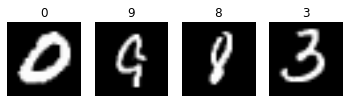

In [5]:
# Checking the data

%matplotlib inline
from matplotlib import pyplot as plt

_len = 4
nos =  np.random.randint(X_train.shape[0], size=_len)

fig, axs = plt.subplots(1,_len)
for idx in range(_len):
    axs[idx].set_yticklabels([])
    axs[idx].set_xticklabels([])
    axs[idx].imshow(X_train[nos[idx]].reshape(28,28), cmap='gray')
    axs[idx].set_title('{0}'.format(y_train[nos[idx]]))


In [6]:
# Pre-processing the data

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
print X_train.shape, Y_train.shape 
print X_test.shape, Y_test.shape, 


(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


 ### Layers:
 keras/layers/core.py ... and others in the folder
 
 ### Initialization
 init='glorot_uniform'  ... default initialization
 
 ### Regularization
 - W_regularizer
 - b_regularizer
 - activity_regularizer
 - W_constraint
 - b_constraint
 
 - Dropout
 - BatchNormalization
 
 ### Activation
 keras/activations.py 
 ... why RELU?

In [9]:
# Some alternate way to create the model:

inp = Input(batch_shape=(None, 784))
dense1 = Dense(512)
act1 = Activation('relu')
drop1 = Dropout(0.2)
dense2 = Dense(512, activation='relu')
drop2 = Dropout(0.2)
dense3 = Dense(10)
act2 = Activation('softmax')

out = act2(dense3(drop2(dense2(drop1(act1(dense1(inp)))))))
           
model = Model(inp, out)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 784)           0                                            
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 512)           401920      input_2[0][0]                    
____________________________________________________________________________________________________
activation_3 (Activation)        (None, 512)           0           dense_4[0][0]                    
____________________________________________________________________________________________________
dropout_3 (Dropout)              (None, 512)           0           activation_3[0][0]               
___________________________________________________________________________________________

In [10]:
# 3-Layered MLP network

out = dense1(inp)
out = act1(out)
out = drop1(out)
out = dense2(out)
out = drop2(out)
out = dense3(out)
out = act2(out)
           
model = Model(inp, out)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 784)           0                                            
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 512)           401920      input_2[0][0]                    
____________________________________________________________________________________________________
activation_3 (Activation)        (None, 512)           0           dense_4[1][0]                    
____________________________________________________________________________________________________
dropout_3 (Dropout)              (None, 512)           0           activation_3[1][0]               
___________________________________________________________________________________________

In [11]:
# Some alternate way to create the model:

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_7 (Dense)                  (None, 512)           401920      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_5 (Activation)        (None, 512)           0           dense_7[0][0]                    
____________________________________________________________________________________________________
dropout_5 (Dropout)              (None, 512)           0           activation_5[0][0]               
____________________________________________________________________________________________________
dense_8 (Dense)                  (None, 512)           262656      dropout_5[0][0]                  
___________________________________________________________________________________________

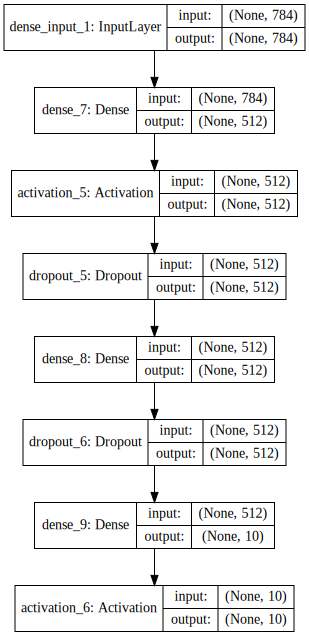

In [12]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### Loss

keras/objectives.py

GoTo losses:
 - mean squared error (regression)
 - catagorical crossentropy (classification)
 - binary crossentropy
 - KL divergence (distance between distributions)

Custom Losses:
 - Variational Loss
 - Smoothness penelty
 - How To:
   - Write and verify your own objective functions before hooking up (my answer .. do give points up if you find it useful !!!) 
     - http://stackoverflow.com/questions/33859864/how-to-create-custom-objective-function-in-keras/40622302#40622302
   - How to pass extra parameter other than y_pred and y_true
     - https://github.com/fchollet/keras/issues/2121
 
 
### Optimizer

keras/optimizers.py
       - 'sgd': SGD,
       - 'rmsprop': RMSprop,
       - 'adagrad': Adagrad,
       - 'adadelta': Adadelta,
       - 'adam': Adam,
       - 'adamax': Adamax,
       - 'nadam': Nadam,
       - 'tfoptimizer': TFOptimizer,

 - Learning Rate
 - Momentum, Decay and other respective parameters
 
 
### Metrics

keras/metrices.py

 - Accuracy
 - Precision, Recall, Fmeasure (For imbalanced classes)

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])


The output file is available at ./mlp.png


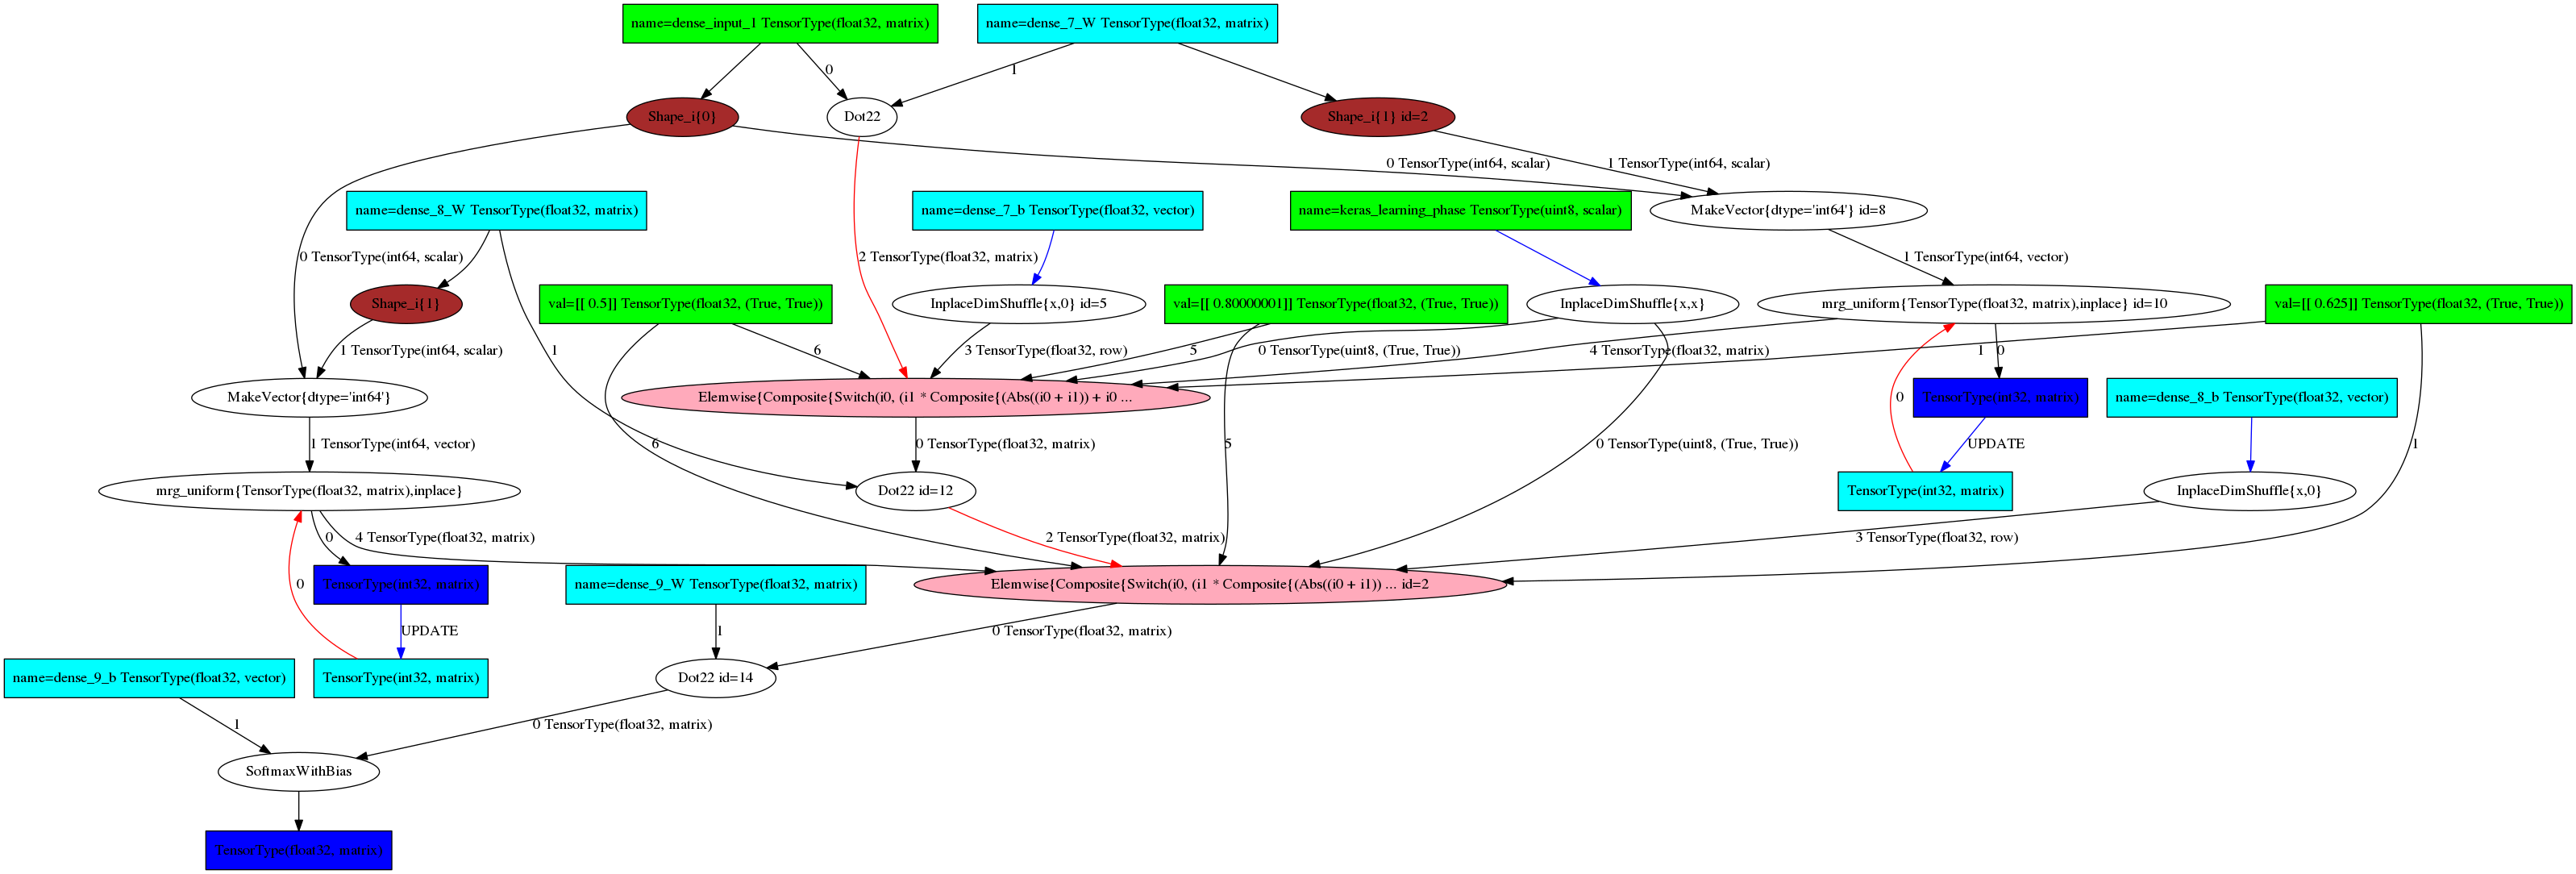

In [14]:
# Visually showing the graph generated
# Note .. for this section you need to use THEANO backend

from theano.printing import pydotprint
from IPython.display import Image

import theano
from keras import backend as K

# Note: Keras traing function is a bit more complex than this .. with optimizers, loss & metics functions etc.
# you can get it at model.train_function  .. you can also see model.test_function and model.predict_function
# also they are created once you call model.fit()
train_func = theano.function([model.layers[0].input, K.learning_phase()], model.layers[-1].output)

pydotprint(train_func, './mlp.png')
Image('./mlp.png', width='100%')


In [17]:
import theano.d3viz as d3v
from IPython.display import IFrame

d3v.d3viz(train_func, 'mlp.html')
IFrame('mlp.html', width=900, height=800)

In [18]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s - loss: 0.2432 - acc: 0.9246 - val_loss: 0.0977 - val_acc: 0.9691
Epoch 2/20
60000/60000 [==============================] - 19s - loss: 0.1020 - acc: 0.9685 - val_loss: 0.0740 - val_acc: 0.9784
Epoch 3/20
60000/60000 [==============================] - 20s - loss: 0.0765 - acc: 0.9763 - val_loss: 0.0848 - val_acc: 0.9760
Epoch 4/20
60000/60000 [==============================] - 20s - loss: 0.0596 - acc: 0.9823 - val_loss: 0.0831 - val_acc: 0.9783
Epoch 5/20
60000/60000 [==============================] - 19s - loss: 0.0506 - acc: 0.9851 - val_loss: 0.0686 - val_acc: 0.9812
Epoch 6/20
60000/60000 [==============================] - 20s - loss: 0.0437 - acc: 0.9868 - val_loss: 0.0788 - val_acc: 0.9793
Epoch 7/20
60000/60000 [==============================] - 20s - loss: 0.0372 - acc: 0.9887 - val_loss: 0.0888 - val_acc: 0.9802
Epoch 8/20
60000/60000 [==============================

In [21]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('Test score:', 0.11926133440057536)
('Test accuracy:', 0.98409999999999997)


   ###  Test the model

In [22]:
Y_pred = model.predict(X_test, verbose=0)
y_pred =  np.argmax(Y_pred, axis=1)

print Y_pred.shape
print y_pred.shape

(10000, 10)
(10000,)


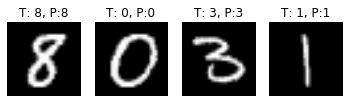

In [23]:
# testing the trained model

_len = 4
nos =  np.random.randint(Y_pred.shape[0], size=_len)

fig, axs = plt.subplots(1,_len)
for idx in range(_len):
    axs[idx].set_yticklabels([])
    axs[idx].set_xticklabels([])
    axs[idx].imshow(X_test[nos[idx]].reshape(28,28), cmap='gray')
    axs[idx].set_title('T: {0}, P:{1}'.format(y_test[nos[idx]], y_pred[nos[idx]]))


159


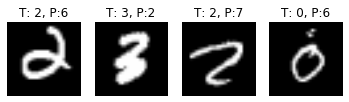

In [24]:
# Looking into the mis-predictions

comp = np.equal(y_pred, y_test)
mis_match = list(np.where(comp==False)[0])

print len(mis_match)
#print mis_match

_len = 4
nos =  np.random.randint(len(mis_match), size=_len)
#print nos

fig, axs = plt.subplots(1,_len)
for idx in range(_len):
    axs[idx].set_yticklabels([])
    axs[idx].set_xticklabels([])
    axs[idx].imshow(X_test[mis_match[nos[idx]]].reshape(28,28), cmap='gray')
    axs[idx].set_title('T: {0}, P:{1}'.format(y_test[mis_match[nos[idx]]], y_pred[mis_match[nos[idx]]]))

(600, 800, 3)
(600, 800)
(1, 784)


6


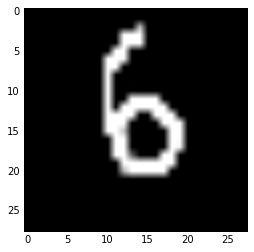

In [26]:
# Trying out user input  .. Open new_inp.jpg in an image editor and modify it to check the predictions

import cv2
image = cv2.imread('new_inp.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
inp_image = cv2.resize(gray_image, (28,28)).reshape(1, 784)/255.

print image.shape
print gray_image.shape
print inp_image.shape
plt.imshow(inp_image.reshape(28,28), cmap='gray')

y_out = model.predict(inp_image)
print '\n\n{0}'.format(np.argmax(y_out))

___________________________________________________

# Convnet

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, SpatialDropout2D
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from keras import backend as K

Using TensorFlow backend.


In [2]:
batch_size = 128
nb_classes = 10
nb_epoch = 20

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [3]:
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [5]:
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                  border_mode='valid', activation = 'relu',
                  input_shape=input_shape, subsample=pool_size),
    SpatialDropout2D(0.25),
    Convolution2D(nb_filters, kernel_size[0], kernel_size[1], activation = 'relu', subsample=pool_size),
    SpatialDropout2D(0.25),
    Flatten(),
]

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 13, 13, 32)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
spatialdropout2d_1 (SpatialDropou(None, 13, 13, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 6, 6, 32)      9248        spatialdropout2d_1[0][0]         
____________________________________________________________________________________________________
spatialdropout2d_2 (SpatialDropou(None, 6, 6, 32)      0           convolution2d_2[0][0]            
___________________________________________________________________________________________

You can see the # of parameters decreased significantly .. by using convolution layers.

Even here the main culprits are the dense layers almost 94% of the parameters are contributed by the dense layers.

### Callbacks

keras/callbacks.py
 - ModelCheckpoint
 - EarlyStopping
 - TensorBoard
 - LambdaCallback .. or better extend keras.callbacks.Callback: Eg: class customCallback(keras.callbacks.Callback)

should checkout: keras/engine/trainining.py ... def fit() and def _fit_loop()


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])


import shutil
try:
    shutil.rmtree('./logs/')
except:
    pass


# Here I am demonstrating tensorboard visualization ..
# Must use tenserflow backend for this.

# tensorboard --logdir=~/0.Work/0.TA_work/DL-keras/logs   ## change the log directory accordingly
tb = TensorBoard(log_dir='./logs', write_images=True)

# by default it works on 'val_loss'(monitor) .. whenever it gets better this checkpoint saves the model
mc = ModelCheckpoint(filepath='model.h5', verbose=1, save_best_only=True)

# if validation accuracy dont get improve for 5(patience) epoches the training stops 
es = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test), callbacks=[tb, mc, es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s - loss: 0.4082 - acc: 0.8764 - val_loss: 0.1177 - val_acc: 0.9625
Epoch 2/20
60000/60000 [==============================] - 3s - loss: 0.1777 - acc: 0.9479 - val_loss: 0.0832 - val_acc: 0.9751
Epoch 3/20
60000/60000 [==============================] - 3s - loss: 0.1399 - acc: 0.9589 - val_loss: 0.0639 - val_acc: 0.9805
Epoch 4/20
60000/60000 [==============================] - 3s - loss: 0.1205 - acc: 0.9647 - val_loss: 0.0584 - val_acc: 0.9817
Epoch 5/20
60000/60000 [==============================] - 3s - loss: 0.1080 - acc: 0.9689 - val_loss: 0.0545 - val_acc: 0.9837
Epoch 6/20
60000/60000 [==============================] - 3s - loss: 0.1012 - acc: 0.9707 - val_loss: 0.0471 - val_acc: 0.9857
Epoch 7/20
60000/60000 [==============================] - 3s - loss: 0.0919 - acc: 0.9734 - val_loss: 0.0468 - val_acc: 0.9854
Epoch 8/20
60000/60000 [==============================] - 3s 

(600, 800, 3)
(600, 800)
(1, 28, 28, 1)


6


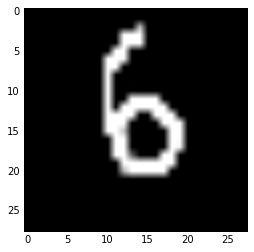

In [7]:
# You can use the previous model tests to test the new models .. 
#    other than the user input one.. as the shape of input in different in this model.

import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

image = cv2.imread('new_inp.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
if K.image_dim_ordering() == 'th':
    inp_image = cv2.resize(gray_image, (28,28)).reshape(1, 1, 28, 28)/255.
else:
    inp_image = cv2.resize(gray_image, (28,28)).reshape(1, 28, 28, 1)/255.


print image.shape
print gray_image.shape
print inp_image.shape
plt.imshow(inp_image.reshape(28,28), cmap='gray')

y_out = model.predict(inp_image, batch_size=1)
print '\n\n{0}'.format(np.argmax(y_out))

# Model Save-Load

In [ ]:
model.save('model.h5')
model.save_weights('model_weights.h5')


model.load('model.h5')
model.load_weights('model_weights.h5')

# Hyperparameters search

In [ ]:
## Officially supported .. see example: keras/examples/mnist_sklear_wrapper.py


from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.grid_search import GridSearchCV


dense_size_candidates = [[32], [64], [32, 32], [64, 64]]
my_classifier = KerasClassifier(model, batch_size=32)
validator = GridSearchCV(my_classifier,
                         param_grid={'dense_layer_sizes': dense_size_candidates,
                                     # nb_epoch is avail for tuning even when not
                                     # an argument to model building function
                                     'nb_epoch': [3, 6],
                                     'nb_filters': [8],
                                     'nb_conv': [3],
                                     'nb_pool': [2]},
                         scoring='log_loss',
                         n_jobs=1)
validator.fit(X_train, y_train)

print('The parameters of the best model are: ')
print(validator.best_params_)

In [ ]:
## https://github.com/maxpumperla/hyperas

from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform, conditional

### Other distributions:
    # randint
    # loguniform
    # normal
    # lognormal


def data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(60000, 784)
    X_test = X_test.reshape(10000, 784)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    nb_classes = 10
    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)
    return X_train, Y_train, X_test, Y_test




def model(X_train, Y_train, X_test, Y_test):
    model = Sequential()
    model.add(Dense(512, input_shape=(784,)))
    model.add(Activation('relu'))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense({{choice([256, 512, 1024])}}))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(Dropout({{uniform(0, 1)}}))

    # If we choose 'four', add an additional fourth layer
    if conditional({{choice(['three', 'four'])}}) == 'four':
        model.add(Dense(100))
        # We can also choose between complete sets of layers
        model.add({{choice([Dropout(0.5), Activation('linear')])}})
        model.add(Activation('relu'))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
                  optimizer={{choice(['rmsprop', 'adam', 'sgd'])}})

    model.fit(X_train, Y_train,
              batch_size={{choice([64, 128])}},
              nb_epoch=1,
              show_accuracy=True,
              verbose=2,
              validation_data=(X_test, Y_test))
    score, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}



if __name__ == '__main__':
    best_run, best_model = optim.minimize(model=model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=5,
                                          trials=Trials())
    X_train, Y_train, X_test, Y_test = data()
    print("Evalutation of best performing model:")
    print(best_model.evaluate(X_test, Y_test))
    
    
    